# This is the processing pipeline for the looking at glioblastome differentation

## Initial setup:
Initial setup for our required packages and setting how verbose our errors should be.
During install, you may need to use ```pip``` rather thna ```pip3```, depends on how python is installed on your system (and what verions you have).

Also, we are suppressing some terminal output using ```grep``` (so the output looks a little cleaner).

In [15]:
!pip3 install numpy | grep -v 'already satisfied'
!pip3 install pandas | grep -v 'already satisfied'
!pip3 install seaborn | grep -v 'already satisfied'
!pip3 install scanpy | grep -v 'already satisfied'

import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.2 anndata==0.8.0 umap==0.5.3 numpy==1.22.0 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.1 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


## Reading Data In
We were only given filtered ```.h5``` files to work with (the unfiltered files seemed to be corrupted). 
This is not ideal as I do not know what steps were taken for this filtering but we will work with it to the best of out ability.

We have the option to do our analysis with only human genes, but we have deciced to include the rat endothelial cells as well.
When testing to see if it made a difference (see the bottom of the notebook), it seemed to be negligible either way.

We are going to mark the human and rat genomes so we can filter by them later in visualization.

If you are storing the data in a nested folder, just fill in ```file_location```.

In [16]:
# Aprrox. 1 sec per read
file_location = ''
data_1914 = '1914/1914_filtered.h5'
data_1914d = '1914d/1914d_filtered.h5'
data_1919 = '1919/1919_filtered.h5'
data_1919d = '1919d/1919d_filtered.h5'

# For remote server
# file_location = '../datasets/'
# data_1914 = 'data_1914/filtered_feature_bc_matrix.h5'
# data_1914d = 'data_1914d/filtered_feature_bc_matrix.h5'
# data_1919 = 'data_1919/filtered_feature_bc_matrix.h5'
# data_1919d = 'data_1919d/filtered_feature_bc_matrix.h5'



adata_1914_human = sc.read_10x_h5(
    file_location + data_1914,
    genome='GRCh38')
adata_1914d_human = sc.read_10x_h5(
    file_location + data_1914d,
    genome='GRCh38')
adata_1919_human = sc.read_10x_h5(
    file_location + data_1919,
    genome='GRCh38')
adata_1919d_human = sc.read_10x_h5(
    file_location + data_1919d,
    genome='GRCh38')

adata_1914_rat = sc.read_10x_h5(
    file_location + data_1914,
        genome='mRatBN7.2')
adata_1914d_rat = sc.read_10x_h5(
    file_location + data_1914d,
    genome='mRatBN7.2')
adata_1919_rat = sc.read_10x_h5(
    file_location + data_1919,
    genome='mRatBN7.2')
adata_1919d_rat = sc.read_10x_h5(
    file_location + data_1919d,
    genome='mRatBN7.2')




reading 1914/1914_filtered.h5
 (0:00:00)
reading 1914d/1914d_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading 1919/1919_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading 1919d/1919d_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading 1914/1914_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading 1914d/1914d_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading 1919/1919_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)
reading 1919d/1919d_filtered.h5


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


 (0:00:00)


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


## Checking Names
It is common for data to be prepended with labels. This is often a product of off the shelf software and can make things harder to work with if you don't remove them. 

We are just going to quickly check and remove if neccesarry.

In [17]:
# View the first 5 rows of the data
adata_1914_human.var.head()
adata_1914_human.obs.head()



""
AAACCCAAGACATCCT-1
AAACCCAAGCATGAAT-1
AAACCCAAGCTAGATA-1
AAACCCAAGTCCTGCG-1
AAACCCACAAAGGAGA-1


### Result:
We see that everything is either prepended by ```GRCh38____``` or ```mRatBN7.2_```. 
Thankfully, it seems that whoever did the previous analysis made sure these prepended labels were always ten charecters by adding underscores, so we can just strip the first ten charecters off all the gene_ids.

## Cleaning Up, Step 1
The first thing we are going to do is strip the first ten charecters from all the gene_ids. 

Then we are going to ensure that all the gene_ids are unique in the respective datasets.

In [18]:
# filter the GRCh38__ from the front of names
adata_1914_human.var_names = [name[10:] for name in adata_1914_human.var_names]
adata_1914d_human.var_names = [name[10:] for name in adata_1914d_human.var_names]
adata_1919_human.var_names = [name[10:] for name in adata_1919_human.var_names]
adata_1919d_human.var_names = [name[10:] for name in adata_1919d_human.var_names]
adata_1914_rat.var_names = [name[10:] for name in adata_1914_rat.var_names]
adata_1914d_rat.var_names = [name[10:] for name in adata_1914d_rat.var_names]
adata_1919_rat.var_names = [name[10:] for name in adata_1919_rat.var_names]
adata_1919d_rat.var_names = [name[10:] for name in adata_1919d_rat.var_names]


# make the gene names unique
adata_1914_human.var_names_make_unique()
adata_1914d_human.var_names_make_unique()
adata_1919_human.var_names_make_unique()
adata_1919d_human.var_names_make_unique()
adata_1914_rat.var_names_make_unique()
adata_1914d_rat.var_names_make_unique()
adata_1919_rat.var_names_make_unique()
adata_1919d_rat.var_names_make_unique()



## Combine
We will combine rat and human, while preserving some annotation so we can filter by them later. 

We also want to combine 1914 and 1914d (same with 1919) to compare them. 

Finally, we want to combine 1914 with 1919 to form a single dataset. This means we will have to be extra careful with our normalization steps.

In [19]:
# Quick Check:
adata_1914_human.obs.head()

""
AAACCCAAGACATCCT-1
AAACCCAAGCATGAAT-1
AAACCCAAGCTAGATA-1
AAACCCAAGTCCTGCG-1
AAACCCACAAAGGAGA-1


In [27]:
adata_human_combined = adata_1914_human.concatenate(adata_1914d_human, adata_1919_human, adata_1919d_human, batch_categories=['1914_human', '1914d_human', '1919_human', '1919d_human'], join='outer')
adata_total_combined = adata_1914_human.concatenate(adata_1914_rat, adata_1914d_human, adata_1914d_rat, adata_1919_human, adata_1919_rat, adata_1919d_human, adata_1919d_rat, batch_categories=['1914_human', '1914_rat', '1914d_human', '1914d_rat', '1919_human', '1919_rat', '1919d_human', '1919d_rat'], join='outer')

adata_human_combined.obs.batch.value_counts()
adata_total_combined.obs.batch.value_counts()


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next 

1914_human     9513
1914_rat       9513
1914d_human    8925
1914d_rat      8925
1919_human     7610
1919_rat       7610
1919d_human    7278
1919d_rat      7278
Name: batch, dtype: int64

### Results Files
It has become standard practice to use ```.h5ad``` files to group all our results and steps together in a single file.

I personally do not like this, but this is standard practice in the field.

Make sure to uncomment anything you want here, and in the previous code blocks.

Afterwards simply choose what you want to run it on by including it in the ```running_on``` array, and where you want to save it in the ```saving_to``` array.

In [28]:
rf_total_combined = 'write/total_combined_final.h5ad'
rf_human_combined = 'write/human_combined_final.h5ad'

running_on = [adata_human_combined, adata_total_combined]
saving_to = [rf_human_combined, rf_human_combined]

In [29]:
# We want to quickly write everything to our results files:
def write_results(running_on, saving_to):
    for i in range(len(running_on)):
        running_on[i].write(saving_to[i])
        print('Wrote to ' + saving_to[i])

In [30]:
write_results(running_on, saving_to)

Wrote to write/human_combined_final.h5ad
Wrote to write/human_combined_final.h5ad


## Filtering
Since, we don't know how things were filitered to begin with, we are just going to do some basic filtering:
1) Filter any cells that have less than 200 genes expressed.
2) Filter any genes that are expressed in less than 2 cells.
3) Annotating any known mitochondrial genes, as they introduce unncessary noise.
4) Filter out any cells with more than 2500 genes.
5) Filter out any cells of which more than 5% of their genes are mitochondrial.

We are also computing QC metrics that we will use throughout. These include:
1) total_genes_by_count: single number for how many genes are present in a cell.
2) n_genes_by_count: single number for the number of genes with at least 1 count in a cell.
3) total_counts: a single number for the total amount of counts expressed by every gene in a cell.
4) pct_counts_mt: The proportion of total counts for a cell which are from mitochondrial genes.

There are others, but are not important for now...


In [31]:

# filter cells with less than 200 genes expressed
def filter_200(running_on):
    for item in running_on:
        sc.pp.filter_cells(item, min_genes=200)
    
# filter genes expressed in less than 2 cells
def filter_2(running_on):
    for item in running_on:
        sc.pp.filter_genes(item, min_cells=2)
        

In [32]:
# Aprrox. 2.5 sec per group
filter_200(running_on)

filtered out 8726 cells that have less than 200 genes expressed
filtered out 41529 cells that have less than 200 genes expressed


In [33]:
# Aprrox. 0.5 sec per group
filter_2(running_on)

filtered out 19469 genes that are detected in less than 2 cells
filtered out 34764 genes that are detected in less than 2 cells


In [34]:

# annotate the group of mitochondrial genes as 'mt'
def annotate_mt(running_on):
    for item in running_on:
        item.var['mt'] = item.var_names.str.startswith('MT-')
# compute QC metrics for all datasets
def qc_metrics(running_on):
    for item in running_on:
        sc.pp.calculate_qc_metrics(item, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    

In [35]:

# Aprrox. 0.5 sec per group
annotate_mt(running_on)


In [36]:
# Aprrox. 0.5 sec per group
qc_metrics(running_on)

In [37]:

# filter cells with more than 2500 genes
def filter_2500(running_on):
    for item in running_on:
        item = item[item.obs.n_genes_by_counts < 2500, :]

# filter cells with more than 5% mitochondrial genes
def filter_5_mt(running_on):
    for item in running_on:
        item = item[item.obs.pct_counts_mt < 5, :]


In [38]:
# Aprrox. 0.5 sec per group
filter_2500(running_on)

In [39]:
# Aprrox. 0.5 sec per group
filter_5_mt(running_on)

## Checking QC Metrics
We are just going to do some quick visualization for QC metrics.

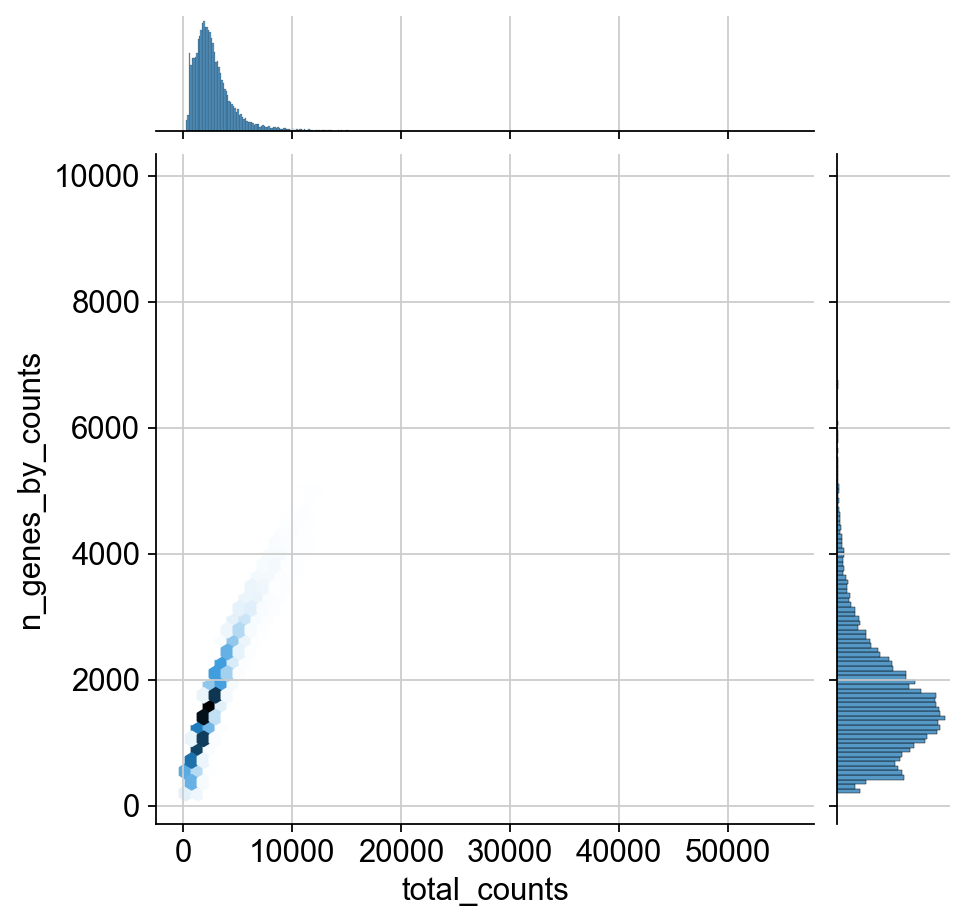

In [41]:

plot1 = sns.jointplot(
        data=adata_total_combined.obs,
        x="total_counts",
        y="n_genes_by_counts",
        kind="hex",
    )



<AxesSubplot: xlabel='pct_counts_mt', ylabel='Count'>

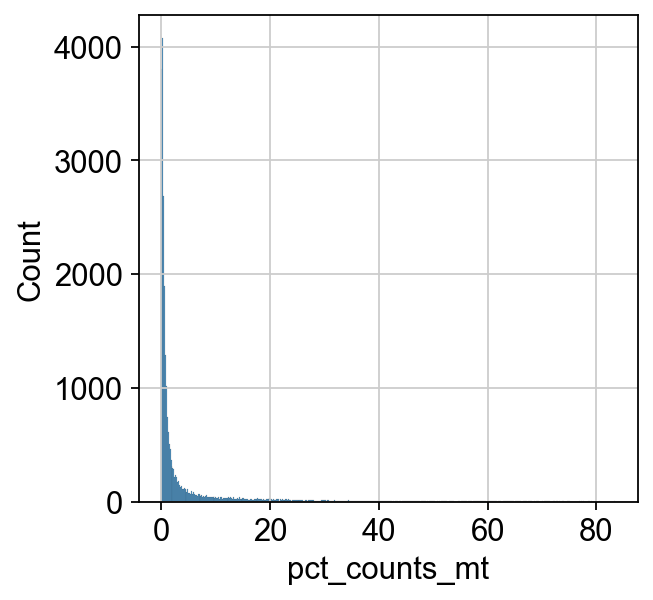

In [42]:
sns.histplot(adata_total_combined.obs["pct_counts_mt"])


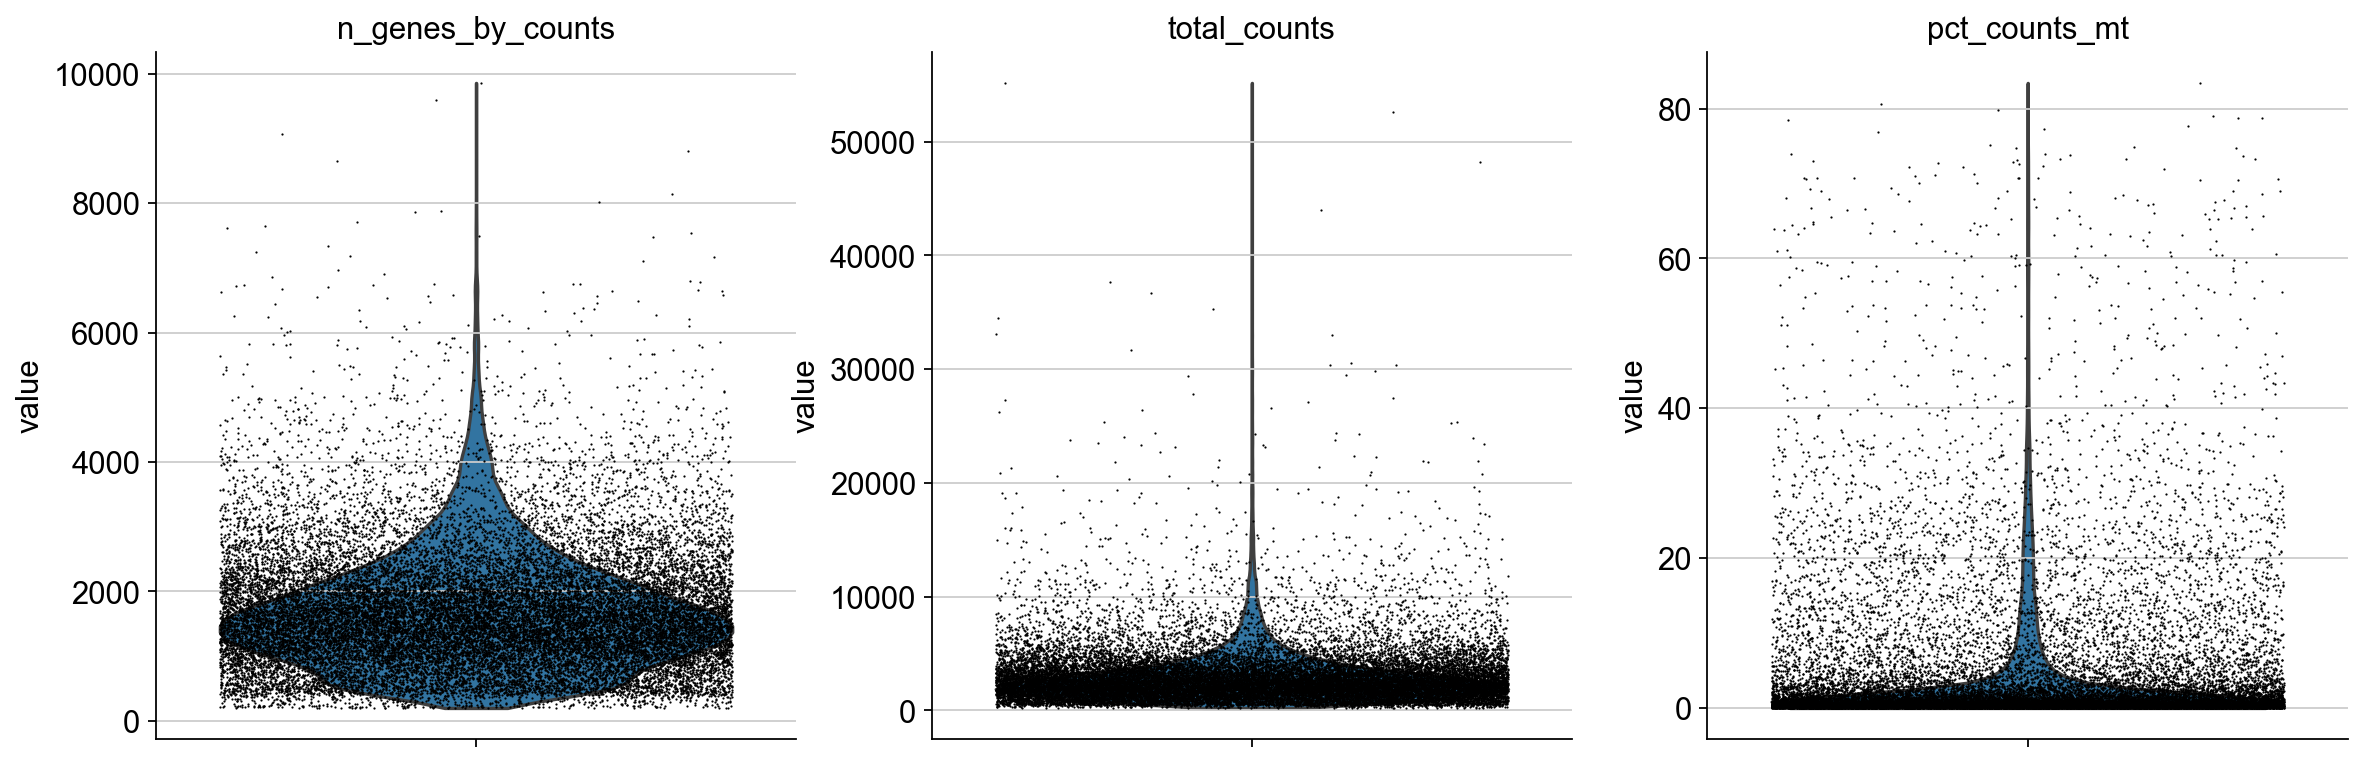

In [43]:
sc.pl.violin(adata_total_combined, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
                jitter=0.4, multi_panel=True)

## Normalization
It is important to normalize our data. Since we are combining different datasets and have done some filtering, we want to make sure that no genes or cells are over represented. Therefore we going to normalize on a per cell basis by essentially dividing all gene counts by the total count data for every cell. 

We will also put them on a log basis to make visualization easier. Just note this for future visualizations.

In [44]:
# Normalize the data
def normalize_data(running_on):
    for item in running_on:
        sc.pp.normalize_total(item, target_sum=1e4)

# Putting on a log scale
def log1p(running_on):
    for item in running_on:
        sc.pp.log1p(item)



In [45]:
# Aprrox. 0.5 sec per group
normalize_data(running_on)

normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


In [46]:
# Aprrox. 0.5 sec per group
log1p(running_on)

## Filtering Again
We are going to filter to only our highly variable genes. We are going to save a copy of our inclusive filtered data later under 'raw'.

In [48]:

# Find variable genes to do anaylsis on
sc.pp.highly_variable_genes(adata_human_combined, min_mean=0.0125, min_disp=0.5, batch_key='batch')
sc.pp.highly_variable_genes(adata_total_combined, min_mean=0.0125, min_disp=0.5, batch_key='batch')



extracting highly variable genes


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
extracting highly variable genes


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.

    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:485: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)


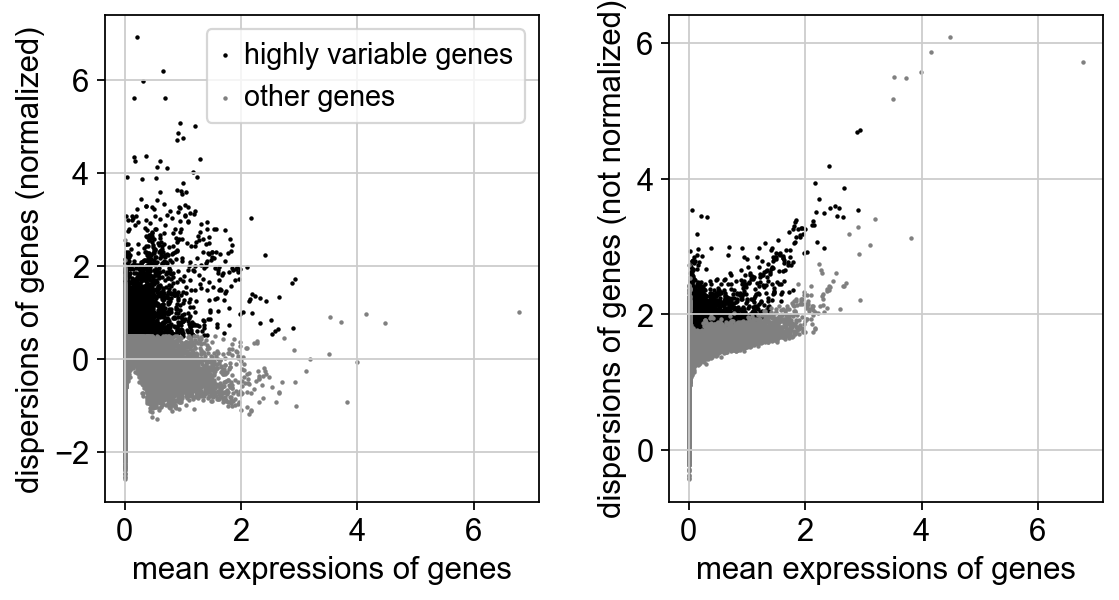

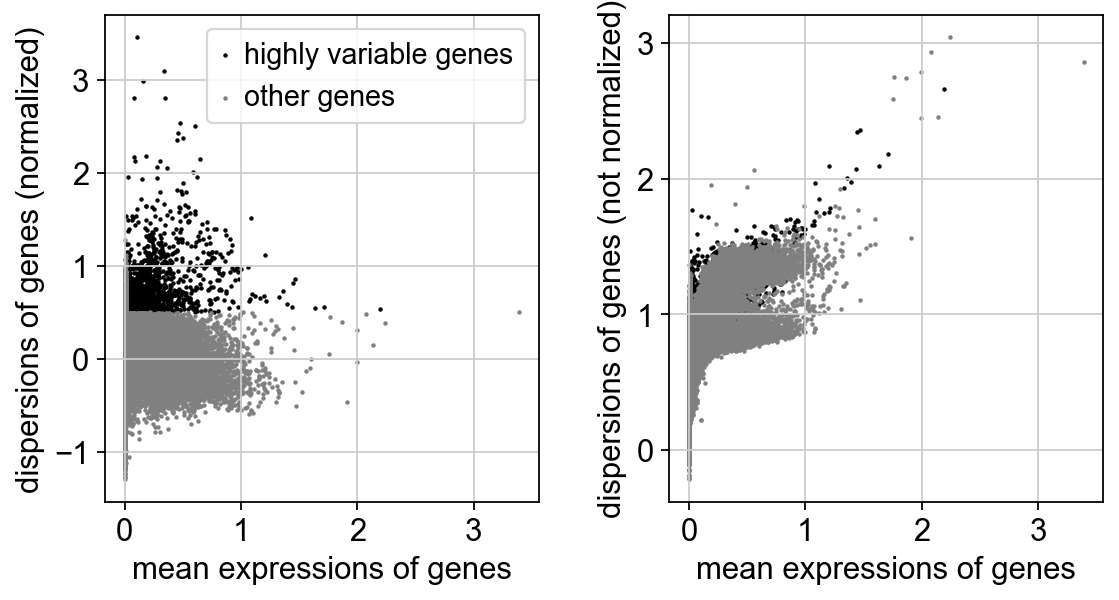

In [49]:
# quick visualisation of the highly variable genes
sc.pl.highly_variable_genes(adata_human_combined)
sc.pl.highly_variable_genes(adata_total_combined)



In [50]:
def save_raw(running_on):
    for item in running_on:
        item.raw = item

# Aprrox. 0.1 sec per group
save_raw(running_on)




In [51]:
def filter_highly_variable(running_on):
    for item in running_on:
        item = item[:, item.var.highly_variable]

# Aprrox. 0.5 sec per group
filter_highly_variable(running_on)

## Regressing out Variation
We are also going to regress out any (hopefully) unwanted sources of variation. This should be pretty safe, but we may want to check out what things look like without that.

### Note:
This can take up to 10+ minutes, so avoid rerunning when you don't need to.


In [55]:
def regress_out(running_on):
    for item in running_on:
        sc.pp.regress_out(item, ['total_counts', 'pct_counts_mt'])
        
# Aprrox. 2 minutes per group
regress_out(running_on)

regressing out ['total_counts', 'pct_counts_mt']
    finished (0:59:34)
regressing out ['total_counts', 'pct_counts_mt']


KeyboardInterrupt: 

In [54]:
# Optionally we can also scale the data, making sure everything is below max

def scale_data(running_on, max=10):
    for item in running_on:
        sc.pp.scale(item, max_value=max)

# Aprrox. 1 sec per group
scale_data(running_on)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


## Analayis
A classic tool to visualizing our data is PCA Analysis. This can take up to 1 minute per sample.

In [56]:
def do_pca(running_on):
    for item in running_on:
        sc.tl.pca(item, svd_solver='arpack')

# Aprrox. 40 sec per group
do_pca(running_on)



computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:01:21)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:01:22)


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


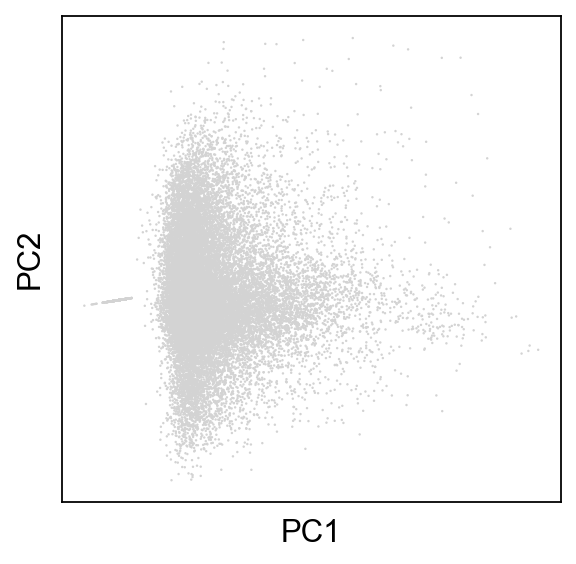

In [57]:
# plotting pca, we should use color...
sc.pl.pca(adata_total_combined)


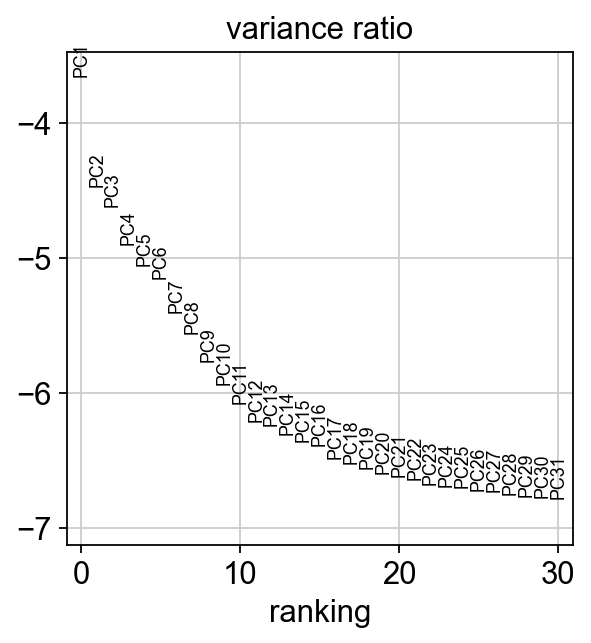

In [58]:
# Taking a look at how impactful each principal component is
sc.pl.pca_variance_ratio(adata_total_combined, log=True)

In [59]:
write_results(running_on, saving_to) 

Wrote to write/human_combined_final.h5ad
Wrote to write/human_combined_final.h5ad


## Nearest Neighbour
This is one of the most important steps of single cell analysis, nearest neighbour analysis.

In [60]:
def do_nearest_neighbour(running_on):
    for item in running_on:
        sc.pp.neighbors(item, n_neighbors=25, n_pcs=40)

# Aprrox. 10 sec per group
do_nearest_neighbour(running_on)



computing neighbors
    using 'X_pca' with n_pcs = 40


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


## Subgrouping
We are going to use the leiden algorithim to group into subgroups.

In [61]:
!pip3 install leidenalg | grep -v 'Requirement already satisfied'
!pip3 install louvain

In [62]:
def do_leiden(running_on):
    for item in running_on:
        sc.tl.leiden(item)

# Aprrox. 5 sec per group
do_leiden(running_on)

running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:05)


In [63]:
def do_louvain(running_on):
    for item in running_on:
        sc.tl.louvain(item)

In [64]:
do_louvain(running_on)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 11 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:04)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:04)


## Manifold Construction
There are a number of methods to do manifold construction, there are three below: tSNE, UMAP, and PAGA (for QC).

In [65]:
plot = False

def do_paga(running_on):
    for item in running_on:
        sc.tl.paga(item)
        sc.pl.paga(item, plot=plot)

# Aprrox. 0.5 sec per group
do_paga(running_on)

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])


## UMAP or tSNE
I prefer UMAP as it preserves data better, but tSNE results in better graphics as it throws away data that is usually noise.

In [66]:

def do_umap(running_on):
    for item in running_on:
      sc.tl.umap(item)
    
# Aprrox. 15 sec per group
do_umap(running_on)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:16)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


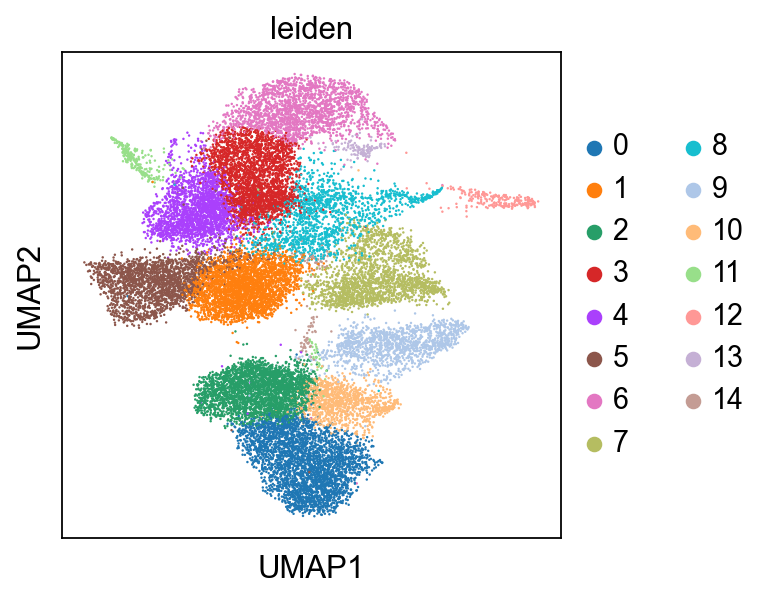

In [67]:
use_raw = False
color = ['leiden']
sc.pl.umap(adata_human_combined, color=color, use_raw=use_raw)

In [68]:
def do_tsne(running_on):
    for item in running_on:
        sc.tl.tsne(item)
        

# Aprrox. 1.5 minutes per group
do_tsne(running_on)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:02:00)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:02:00)


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


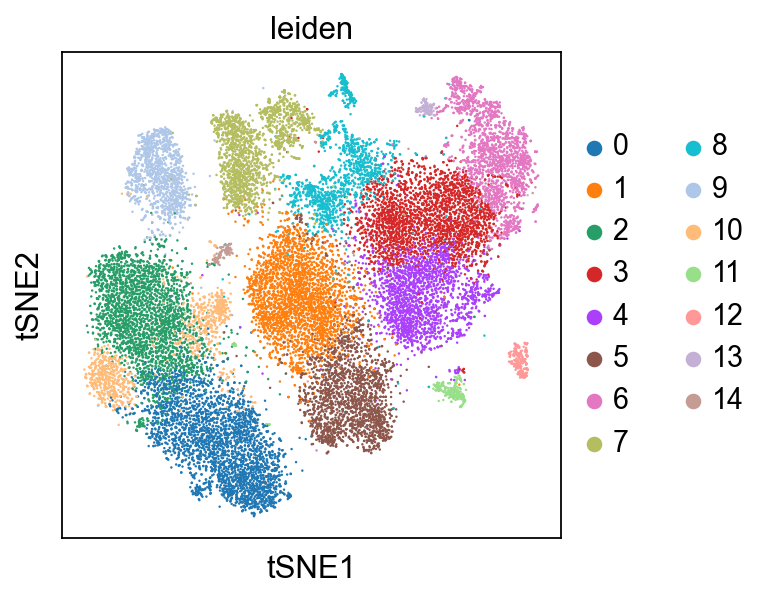

In [69]:
use_raw = False
color = ['leiden']

# plotting tsne
sc.pl.tsne(adata_human_combined, color=color, use_raw=use_raw)

In [70]:
write_results(running_on, saving_to)

Wrote to write/human_combined_final.h5ad
Wrote to write/human_combined_final.h5ad


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


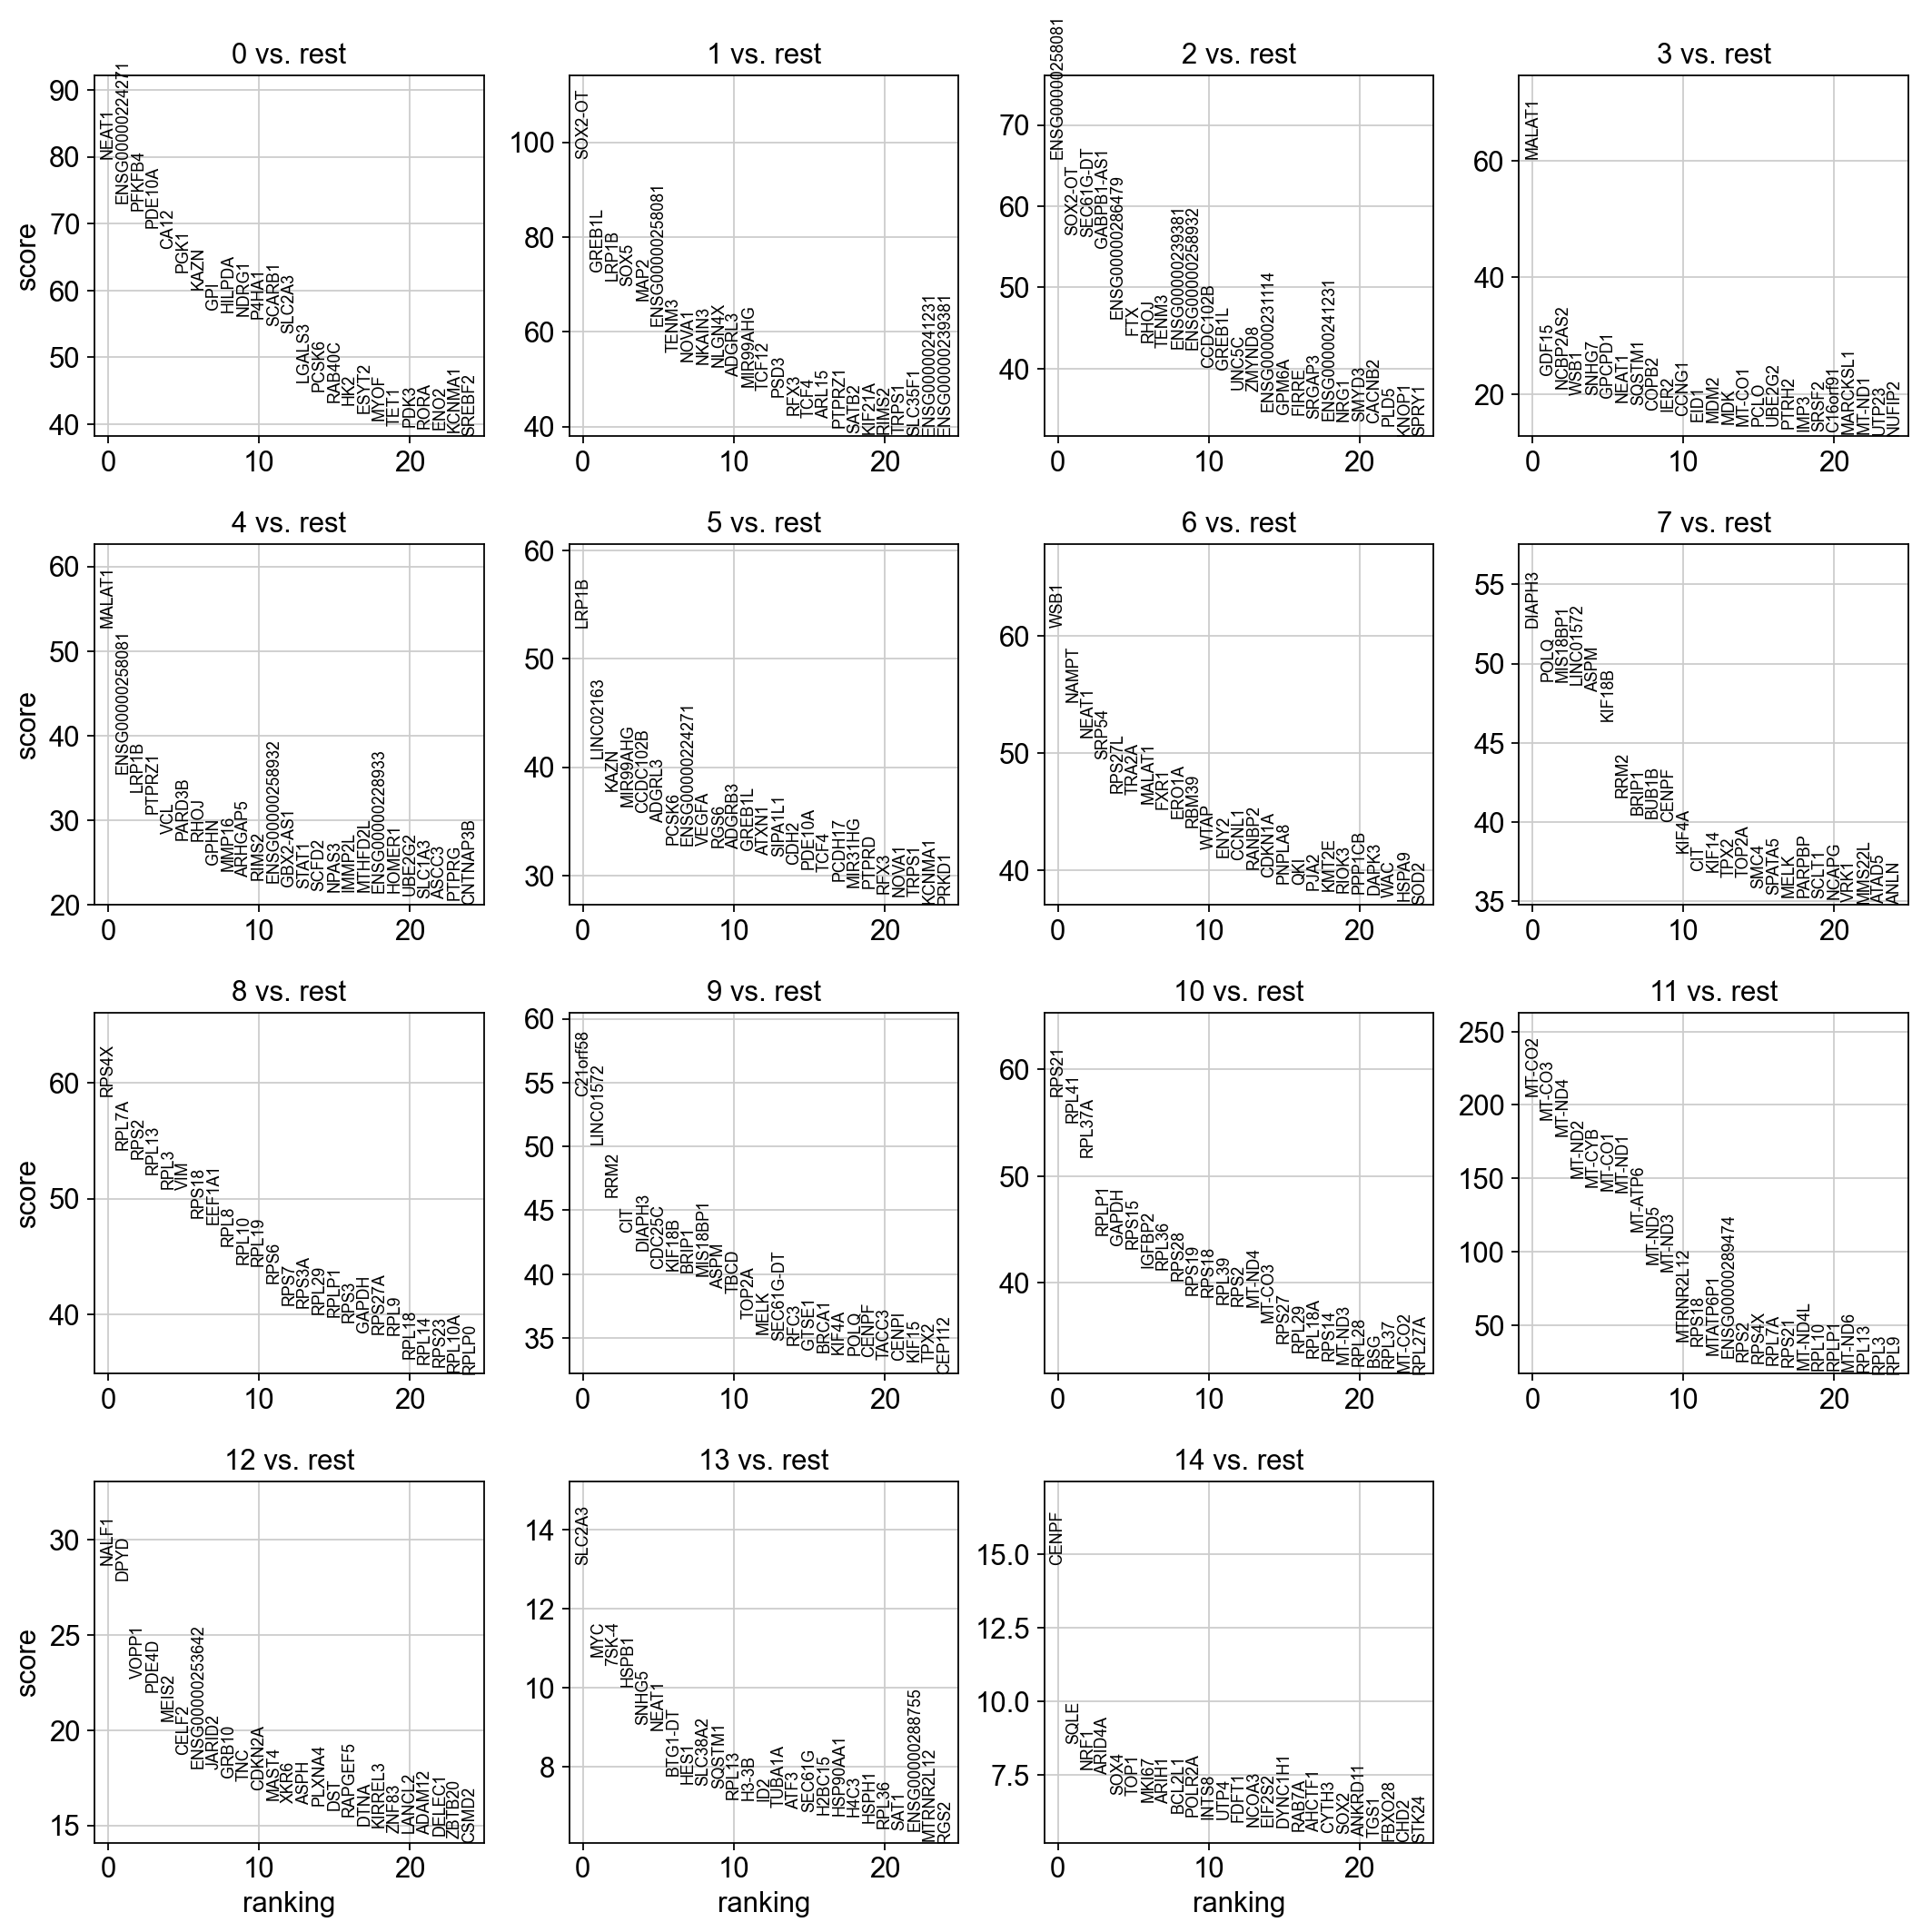

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


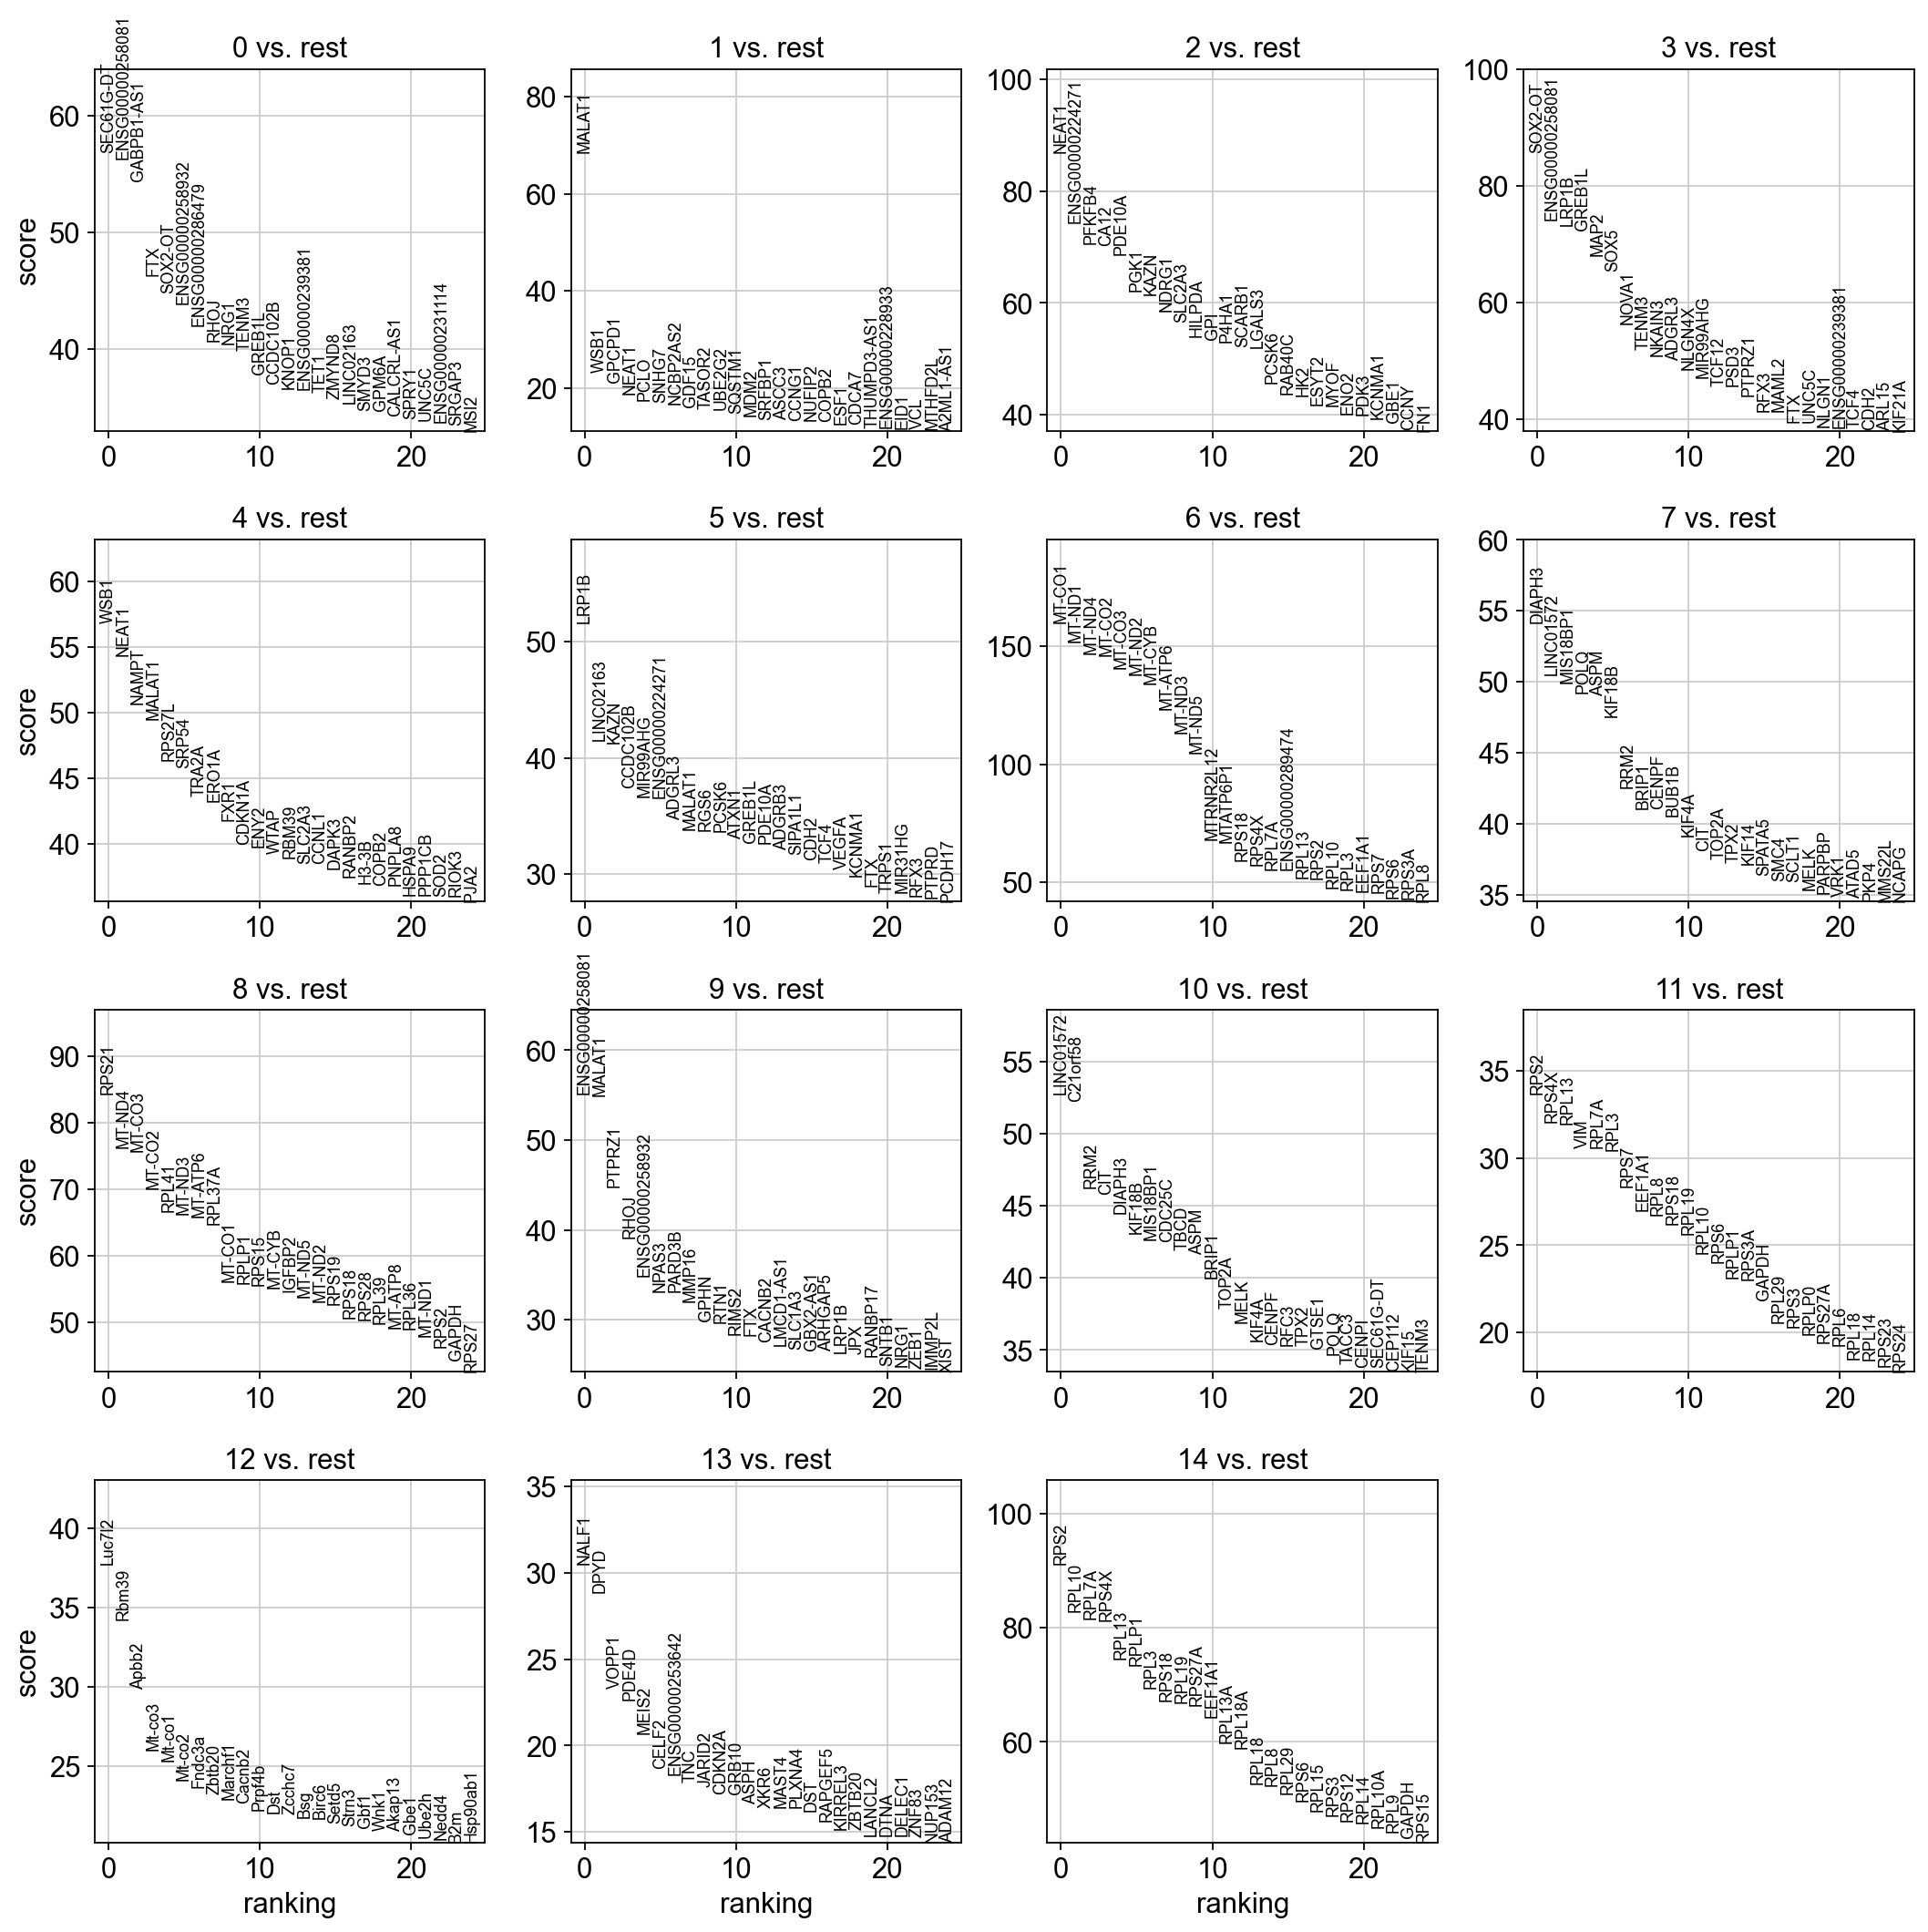

In [71]:
number_of_genes = 25
method = "t-test" # an alternative to try is wilconxon

def rank_gene_groups(running_on):
    for item in running_on:
        sc.tl.rank_genes_groups(item, 'leiden', method=method)
        sc.pl.rank_genes_groups(item, n_genes=number_of_genes, sharey=False, pts=True)

# Aprrox. 10 sec per group
rank_gene_groups(running_on)

## Ingesting Reference

In [ ]:
import os

# path for local storage
path = "/Volumes/Extreme_SSD/snRNA/"

# path for remote storage:
# path = "data/"

# for each folder in path make an adata object with a unique name with read_10x_mtx
folders = os.listdir(path)

data=[]
for folder in folders:
    adata = sc.read_10x_mtx(path+folder, var_names='gene_symbols', cache=True, prefix=folder+'_')
    data.append([folder,
                  adata])

In [ ]:
## Shortcut to load data
# adata_us_combined = sc.read_h5ad('write/human_combined_final.h5ad')
# adata_total_combined = sc.read_h5ad('write/total_combined_final.h5ad')


In [ ]:
adata_total_combined.obs['sample_type'] = adata_total_combined.obs.index.str.split('-1-').str[1]
adata_total_combined.obs


In [ ]:
# how many leiden clusters are there?
adata_total_combined.obs['louvain'].value_counts()

## Annotating Reference Data

In [102]:
cell_types = pd.read_csv('SF1/GSE138794_snRNA_Seq_cell_types.txt', sep=' ', header=None, index_col=0)
sample_identifiers = [
    "SF10022",
    "SF10127",
    "SF11979",
    "SF12090",
    "SF12264",
    "SF4400",
    "SF4297",
    "SF6996",
    "SF9259R",
    "SF9259S"
]

data2=[]
cell_t = cell_types

for identifier in sample_identifiers:
    # get the adata object in data where sample identifier is in the name of the adata object [0]
    adata = [x for x in data if identifier in x[0]][0][1]
    print(adata)
    cell_t = cell_types
    print(identifier)
    # remove all cell types that don't begin with the sample identifier
    print(cell_types.index.str.startswith(identifier).sum())

    cell_t = cell_t[cell_t.index.str.startswith(identifier)]
    # print(cell_t)
    # remove the sample identifier from the cell type
    cell_t.index = cell_t.index.str.replace(identifier + '_', '')
    # add the cell types to the adata object
    # print(cell_t)
    print(len(cell_t), len(adata))

    # # add the cell types to the adata[i].obs dataframe where index matches obs
    try:
        adata.obs['cell_type'] = cell_t.loc[adata.obs.index, 1]
        # print(adata.obs)
        data2.append([identifier, adata])
    except:
        print('error')
        pass

AttributeError: AnnData has no attribute __contains__, don’t check `in adata`.

In [ ]:
adata_ref_combined = sc.AnnData.concatenate(*[x[1] for x in data2], batch_categories=[x[0] for x in data2])

In [93]:
sc.pp.pca(adata_ref_combined)
sc.pp.neighbors(adata_ref_combined)
sc.tl.umap(adata_ref_combined)
sc.tl.louvain(adata_ref_combined, resolution=0.5)
adata_ref_combined.write('write/ref_snseq_raw.h5ad')

computing PCA
    with n_comps=50
    finished (0:01:11)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:18)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 17 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:04)


In [87]:
# shortcut for loading data
# adata_ref_combined = sc.read_h5ad('write/concat.h5ad')

In [96]:
adata_ref_combined.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,louvain,leiden,batch
AAACCCAAGCCTCTGG-1-ref,2533,2533,5629.0,0.0,0.000000,3,0,ref
AAACCCAAGGTTACCT-1-ref,2531,2531,4636.0,0.0,0.000000,3,11,ref
AAACCCAGTACTAGCT-1-ref,3186,3186,6829.0,3.0,0.043930,3,0,ref
AAACCCAGTACTCGAT-1-ref,2602,2602,5158.0,2.0,0.038775,3,1,ref
AAACGAAAGACTGGGT-1-ref,2686,2686,5603.0,0.0,0.000000,7,4,ref
...,...,...,...,...,...,...,...,...
TTTGTTGCATCCTTGC-1-1919d_human-new,1593,1593,2256.0,6.0,0.265957,5,6,new
TTTGTTGGTGTAGTGG-1-1919d_human-new,2484,2484,4690.0,5.0,0.106610,0,10,new
TTTGTTGTCCATACTT-1-1919d_human-new,1155,1155,1594.0,115.0,7.214554,0,1,new
TTTGTTGTCCCAAGCG-1-1919d_human-new,1261,1261,1564.0,6.0,0.383632,10,15,new


/Users/shaunregenbaum/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


KeyError: 'Could not find key cell_type in .var_names or .obs.columns.'

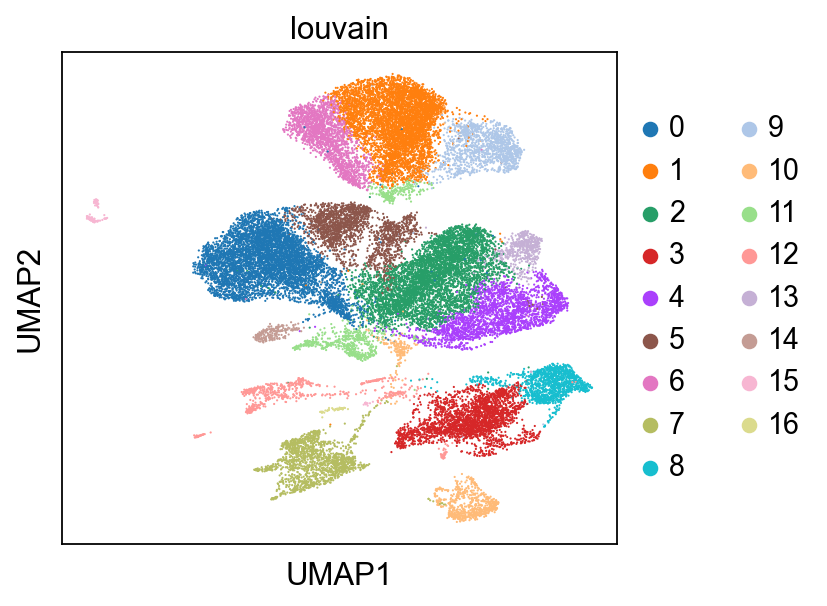

In [94]:
sc.pl.umap(adata_ref_combined, color=['louvain', 'cell_type'], wspace=0.5)

In [ ]:
var_names = adata_ref_combined.var_names.intersection(adata_total_combined.var_names)
adata_ref = adata_ref_combined[:, var_names]
adata_total = adata_total_combined[:, var_names]

In [ ]:
adata_total.obs['clusters'] = adata_total.obs['louvain']


In [ ]:
sc.tl.ingest(adata_total, adata_ref, obs='louvain')


In [ ]:
sc.pl.umap(adata_total, color=['cell_type', 'clusters'])


In [ ]:
# make new category obs based on index name after -1-
adata_total.obs['sample_type'] = adata_total.obs.index.str.split('-1-').str[1]


In [ ]:
adata_concat = adata_ref.concatenate(adata_total, batch_categories=['ref', 'new'])


In [ ]:
# adata_concat.obs.louvain = adata_concat.obs.louvain.astype('category')
# adata_concat.obs.louvain.cat.reorder_categories(adata_ref.obs.louvain.cat.categories, inplace=True)  # fix category ordering
# adata_concat.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix category colors


In [ ]:
# Remove rat cells where there the the word rat in sample type from the adata_concat
# adata_concat_no_rat = adata_concat[adata_concat.obs['sample_type'].str.contains('rat') == False]

In [ ]:

# make the image bigger
sc.set_figure_params(dpi=80, facecolor='white', figsize=(10, 10))

# set size column that everything that has cell_type is 10 and everything else is 1
adata_concat.obs['size'] = 6

sc.pl.umap(adata_concat, color=['cell_type'], wspace=0.5, size=adata_concat.obs['size'])

In [ ]:
# make the dots of of everything with 'cell_type' category that is not NA bigger
adata_concat.obs['size'] = 10
adata_concat.obs.loc[adata_concat.obs['cell_type'].notna(), 'size'] = 5

sc.pl.umap(adata_concat, color=['clusters'], wspace=0.5, size=adata_concat.obs['size'])

## Analyzing Cluster

In [ ]:
# for each louvain cluster, plot the cell type distribution
for i in adata_concat.obs.louvain.cat.categories:
    print(i)
    try:
        sc.pl.umap(adata_concat[adata_concat.obs.louvain == i], color=['clusters'])
        
    except:
        pass

In [ ]:
# cell_type_2 is based on louvain: cluster 0 = endothelial, cluster 1 = Stem Cells (Mesenchymal), Cluster 2 = Oligodendyrocye-like, Cluster 6 = Astrocyte-like, Cluster 7 = Stem Cells (Mesenchymal, Proneural Mix), Cluster 8 = Stem Cells (Mesenchymal, Proneural Mix)
# for all louvain cluster 0, set cell_type_2 to be Endothelial
# drop cell_type_3
# adata_concat.obs.drop(columns=['cell_type_3'], inplace=True)
adata_concat.obs.loc[adata_concat.obs.clusters == '2', 'cell_type_3'] = 'Maturing Mesenchymal'
adata_concat.obs.loc[adata_concat.obs.clusters == '3', 'cell_type_3'] = 'Mesenchymal/Proneural Mix (70/30)'
adata_concat.obs.loc[adata_concat.obs.clusters == '4', 'cell_type_3'] = 'Mesenchymal'
adata_concat.obs.loc[adata_concat.obs.clusters == '7', 'cell_type_3'] = 'Mesenchymal/Proneural Mix (80/20)'
adata_concat.obs.loc[adata_concat.obs.clusters == '26', 'cell_type_3'] = 'Stem Cells/Mesenchymal/Pron Mix'
adata_concat.obs.loc[adata_concat.obs.clusters == '1', 'cell_type_3'] = 'Oligodendorcyte'
adata_concat.obs.loc[adata_concat.obs.clusters == '0', 'cell_type_3'] = 'Proneural'
adata_concat.obs.loc[adata_concat.obs.clusters == '48', 'cell_type_3'] = 'Proneural'
adata_concat.obs.loc[adata_concat.obs.clusters == '5', 'cell_type_3'] = 'Astrocyte-like'

# for everything that is not na, but does have a cell type in cell_type, set cell_type_3 to be the same as cell_type
# for everything that does not have a cell type in cell_type, and does not have a cell_type_3 set to be rat_endothelial
adata_concat.obs.loc[adata_concat.obs.cell_type_3.isna() & adata_concat.obs.cell_type.isna(), 'cell_type_3'] = 'Rat Endothelial'

# adata_concat.obs.loc[adata_concat.obs.cell_type_3.isna() & adata_concat.obs.cell_type.notna(), 'cell_type_3'] = adata_concat.obs.cell_type


In [ ]:
# save cell_type count and plot as histogram

# adata_concat.obs.cell_type_3.value_counts().plot(kind='bar')

# remove rat endothelial and make each value as a fraction of the whole
# adata_concat.obs.cell_type_3.value_counts().drop('Rat Endothelial').plot(kind='bar')

# do each cell type as a percentage
# adata_concat.obs.cell_type_3.value_counts().drop('Rat Endothelial').apply(lambda x: x/adata_concat.obs.cell_type_3.value_counts().drop('Rat Endothelial').sum()).plot(kind='bar')

# as a pie chart with percentages overlaid
adata_concat.obs.cell_type_3.value_counts().drop('Rat Endothelial').apply(lambda x: x/adata_concat.obs.cell_type_3.value_counts().drop('Rat Endothelial').sum()).plot(kind='pie', autopct='%1.1f%%')


In [ ]:
# save the adata_concat
adata_concat.write('concat_final.h5ad')

## Reisolating Data

In [ ]:
# renormalize and log and neighbours umap adata_new
adata_new = adata_concat[adata_concat.obs['batch'] == 'new']

sc.tl.pca(adata_new, svd_solver='arpack')
sc.pp.neighbors(adata_new, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_new)
sc.tl.leiden(adata_new, resolution=0.5)

# call all na values in cell_type_3 'rat_endothelial'
adata_new.obs['cell_type_3'] = adata_new.obs['cell_type_3'].fillna('rat_endothelial')

# save the adata_new
adata_new.write('reisolated_data_final.h5ad')

## No rat

In [ ]:
adata_new_no_rat = adata_new[adata_new.obs['sample_type'].str.contains('rat') == False]

sc.tl.pca(adata_new_no_rat, svd_solver='arpack')
sc.pp.neighbors(adata_new_no_rat, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_new_no_rat)
sc.tl.leiden(adata_new_no_rat, resolution=0.5)


In [ ]:
sc.pl.umap(adata_new_no_rat, color="cell_type_3")


## Trajectory Analysis

In [ ]:
sc.tl.paga(df, groups='cell_type_3')


In [ ]:
# plot paga
sc.pl.paga(df, color=['cell_type_3'], node_size_scale=1, node_size_power=1, layout='fr')